0. Preparing Data

In [1]:
import tensorflow as tf
import os

In [2]:
#Remove dodgy images

import cv2
import imghdr
import matplotlib.pyplot as plt

In [3]:
data_dir = 'datasets'
#os.listdir(os.path.join(data_dir,'PetImages','Cat'))

In [4]:
image_exts = ['jpeg','jpg','bmp','png']

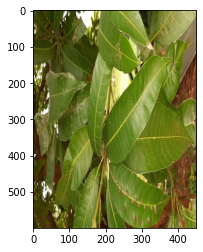

In [8]:
img_arr = cv2.imread(os.path.join(data_dir,'Mango','160.jpg'))
img_arr.shape
plt.imshow(cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
for img_class in os.listdir(os.path.join(data_dir,'New folder')):
                            for image in os.listdir(os.path.join(data_dir,'New folder',img_class)):
                                    image_path = os.path.join(data_dir,'New folder',img_class,image)
                                    try:
                                            img = cv2.imread(image_path)
                                            tip = imghdr.what(image_path)
                                            if tip not in image_exts:
                                                    print("Image not in extension list {}".format(image_path))
                                                    os.remove(image_path)
                                    except Exception as e:
                                            print("Issue with iamges {}".format(image_path))
                                            os.remove(image_path)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'datasets\\New folder'

1. Load Data

In [81]:
tf.data.Dataset
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [11]:
import numpy as np

In [12]:
#can look at the doc and change parametrers with ??

data = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir),label_mode = "categorical")

Found 358 files belonging to 3 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()
#print(batch)
#print(batch[0].shape)
#print(len(batch))





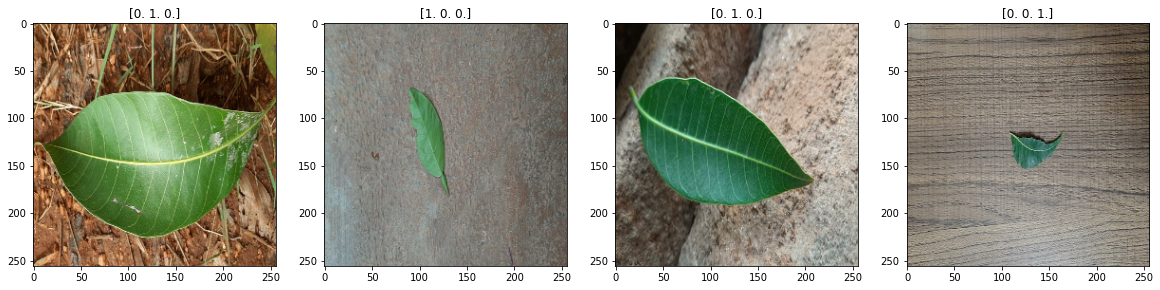

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
#[0, 0, 1] = Neem , [1,0,0] = Lemon , [0, 1, 0] = mango

2. Preprocess Data

In [16]:
data = data.map(lambda x,y: (x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [17]:
scaled_iterator = data.as_numpy_iterator()

In [18]:
batch = scaled_iterator.next()

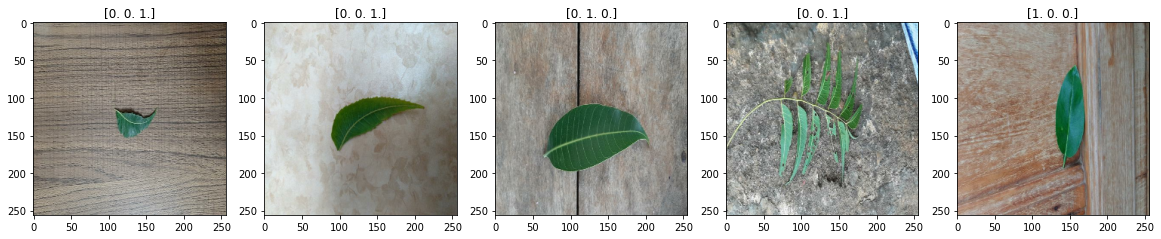

In [ ]:
fig, ax = plt.subplots(ncols = 5, figsize = (20,20))

for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
#[0, 0, 1] = Neem , [1,0,0] = Lemon , [0, 1, 0] = mango


In [20]:
len(data)

12

In [21]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2) + 1
test_size = int(len(data)*0.1) + 1

In [22]:
print(train_size,test_size,val_size)

8 2 3


In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(val_size)

3. Building the Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16,(3,3), 1, activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation ='relu'))
model.add(Dense(3, activation = 'softmax'))

In [27]:
model.compile('adam', loss = tf.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [29]:
logdir = os.path.join('datasets','log_dir','log')

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [31]:
hist = model.fit(train, epochs = 40,validation_data= val, callbacks = [tensorboard_callback])

Epoch 1/40
8/8 [==============================] - 6s 582ms/step - loss: 1.4856 - accuracy: 0.3438 - val_loss: 1.0632 - val_accuracy: 0.4167
Epoch 2/40
8/8 [==============================] - 4s 526ms/step - loss: 1.0259 - accuracy: 0.4727 - val_loss: 0.9644 - val_accuracy: 0.5312
Epoch 3/40
8/8 [==============================] - 4s 544ms/step - loss: 0.9830 - accuracy: 0.4805 - val_loss: 0.9492 - val_accuracy: 0.7083
Epoch 4/40
8/8 [==============================] - 4s 517ms/step - loss: 0.8751 - accuracy: 0.6719 - val_loss: 0.8291 - val_accuracy: 0.5729
Epoch 5/40
8/8 [==============================] - 5s 545ms/step - loss: 0.7096 - accuracy: 0.6836 - val_loss: 0.6058 - val_accuracy: 0.7500
Epoch 6/40
8/8 [==============================] - 4s 542ms/step - loss: 0.6719 - accuracy: 0.7109 - val_loss: 0.6379 - val_accuracy: 0.6875
Epoch 7/40
8/8 [==============================] - 4s 541ms/step - loss: 0.5419 - accuracy: 0.7617 - val_loss: 0.4673 - val_accuracy: 0.8229
Epoch 8/40
8/8 [====

In [32]:
hist.history

{'loss': [1.4855873584747314,
  1.02585768699646,
  0.98296058177948,
  0.8751282095909119,
  0.7096269130706787,
  0.6718775033950806,
  0.5419264435768127,
  0.3813718855381012,
  0.3507632911205292,
  0.3237265944480896,
  0.2615423798561096,
  0.22156494855880737,
  0.16370728611946106,
  0.14131402969360352,
  0.11786068975925446,
  0.1199660524725914,
  0.06778699159622192,
  0.06389882415533066,
  0.06658762693405151,
  0.07218798249959946,
  0.052418164908885956,
  0.037179939448833466,
  0.07992878556251526,
  0.12361167371273041,
  0.06877005100250244,
  0.06675660610198975,
  0.026899240911006927,
  0.016436072066426277,
  0.011407822370529175,
  0.00931500643491745,
  0.0057199085131287575,
  0.007486936170607805,
  0.004599717911332846,
  0.003074879292398691,
  0.0019689032342284918,
  0.001944165676832199,
  0.0017299640458077192,
  0.0017021173844113946,
  0.0013345337938517332,
  0.001463050488382578],
 'accuracy': [0.34375,
  0.47265625,
  0.48046875,
  0.671875,
  0.

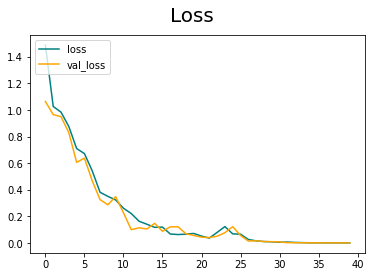

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label = 'loss')
plt.plot(hist.history['val_loss'],color='orange',label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

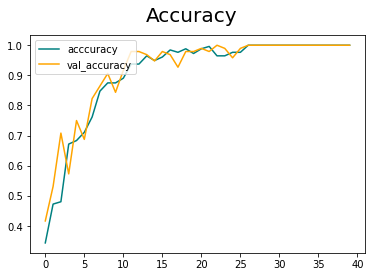

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label = 'acccuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

4. Evaluate Accuracy

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 128ms/step


In [38]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


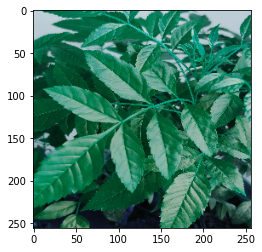

In [99]:
img = cv2.imread(os.path.join(data_dir, 'Test','neem_tree_leaves_2.jpeg'))
img = tf.image.resize(img, (256,256))
plt.imshow(img.numpy().astype(int))
plt.show()

In [100]:
yhat = model.predict(np.expand_dims(img/255,0))

1/1 [==============================] - 0s 24ms/step


In [101]:
answer = np.argmax(yhat) 
np.where(yhat[0] == answer)[0]
yhat

array([[2.0476321e-08, 1.0000000e+00, 1.9792332e-21]], dtype=float32)

#### Confidence?

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','Leaves.h5'))

In [ ]:
new_model = load_model(os.path.join('models','Leaves.h5'))

In [ ]:
yhat = new_model.predict(np.expand_dims(img/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [ ]:
yhat

array([[9.8080498e-05, 9.9930787e-01, 5.9402856e-04]], dtype=float32)